In [2]:
import pandas as pd
from i_01_insights_functions_raw_data import check_duplicates, check_null_values, check_general_info
from i_03_insights_functions_preprocess_data import plot_crosstab

In [3]:
df = pd.read_feather('../data/intermediate/preprocess_df.feather')

In [4]:
check_general_info(df)

--INFO--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   chrun             7043 non-null   int64         
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   int64         
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   months            7043 non-null   float64       
 9   internetservice   7043 non-null   object        
 10  onlinesecurity    5517 non-null   float64       
 11  onlinebackup      5517 non-null   float64       
 12  deviceprotection  5517 non-null   float64       
 13  techsupport       5517 non-null   float64       
 14  streamingtv    

In [5]:
check_duplicates(df)

Duplicates: 0


In [6]:
check_null_values(df)

Null values: 
          customerid             0
begindate              0
chrun                  0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
months                 0
internetservice        0
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
gender                 0
seniorcitizen          0
partner                0
dependents             0
multiplelines        682
dtype: int64


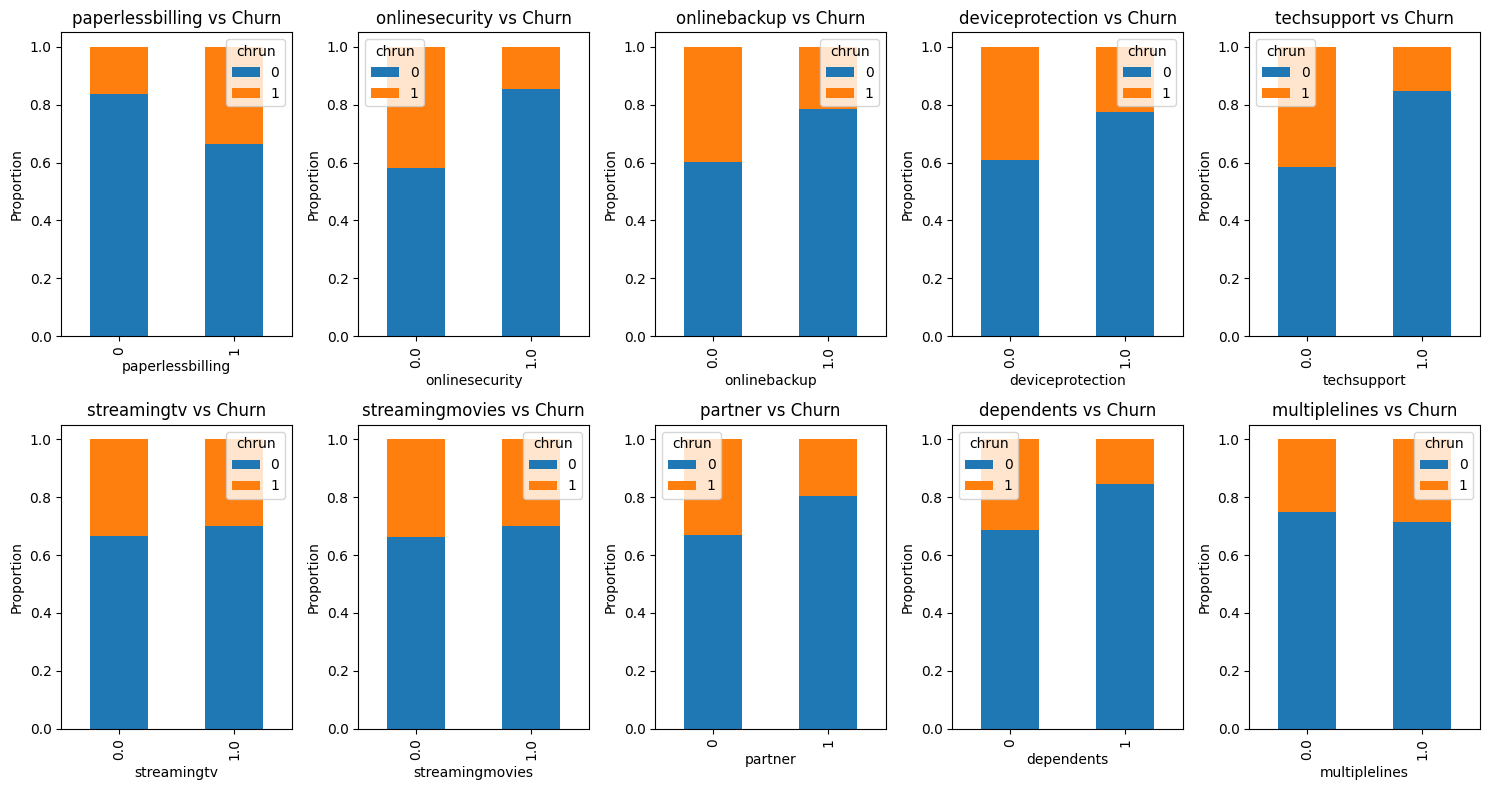

In [7]:
yes_no_columns = ['paperlessbilling', 'onlinesecurity', 'onlinebackup','deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'partner', 'dependents', 'multiplelines']
plot_crosstab(df, yes_no_columns, 'chrun', 2,5)

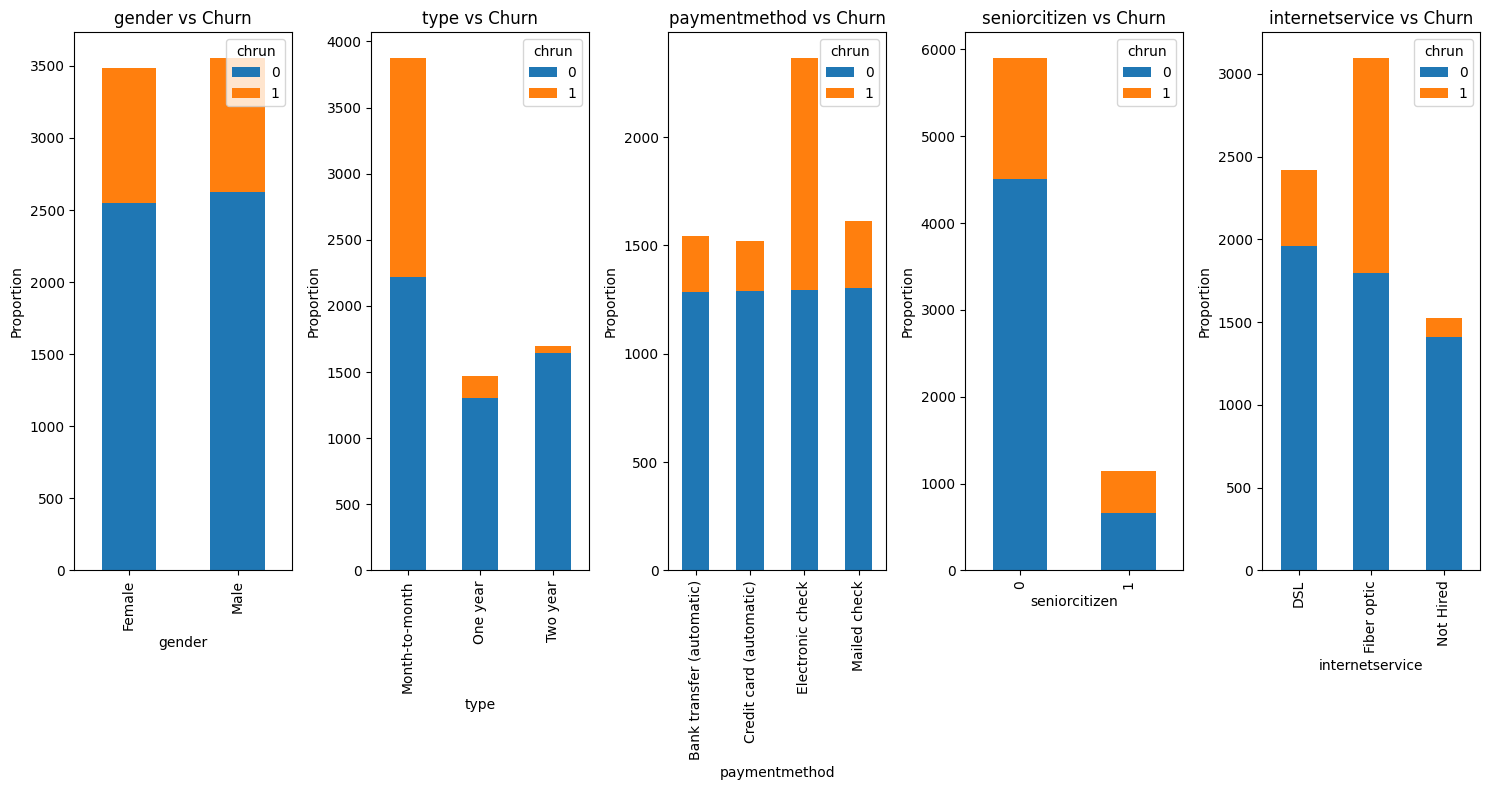

In [9]:

others_cross = ['gender', 'type', 'paymentmethod', 'seniorcitizen', 'internetservice']
plot_crosstab(df, others_cross, 'chrun',1,5, False)

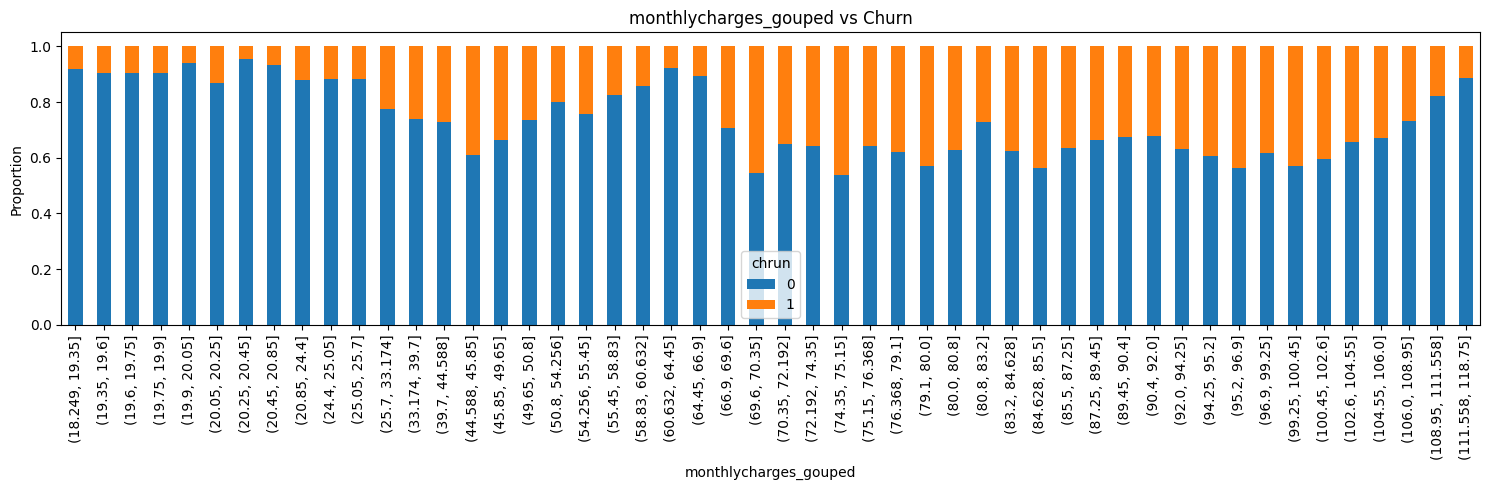

In [10]:
df['monthlycharges_gouped'] = pd.qcut(df['monthlycharges'], q=50)
plot_crosstab(df, 'monthlycharges_gouped', 'chrun',1,1)

Observations:
- Variables such as multiple lines, streamingTV, and streaming movies do not provide much information about the target variable, as they show similar percentages of users who have churned.

- Variables like payment method and contract type visibly provide more insight, as the number of users who churn is noticeably higher in certain categories.

- This analysis suggests that dimensionality could potentially be reduced by removing some columns, which would help simplify the models.

- The analysis of tenure and churn shows that customers who have had the service for a longer time are more likely to cancel it.

- No variables appear to have a strong influence at first glance; however, it is noticeable that variables such as month-to-month payment type and electronic check as a payment method tend to have more users who leave the service.

- When grouping payment data and plotting it against the churn rate, users with higher payments tend to churn more than those with lower payments.